In [1]:
from utils import *

(121, 100, 3)


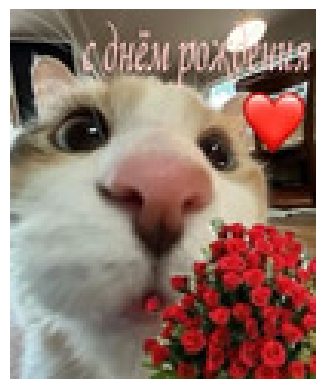

In [2]:
im = cv2.imread('images/damn.jpg')
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im_rgb = np.array(im_rgb)
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = np.array(im_gray)

print(im_rgb.shape)

plt.imshow(im_rgb)
plt.axis('off')
plt.show()

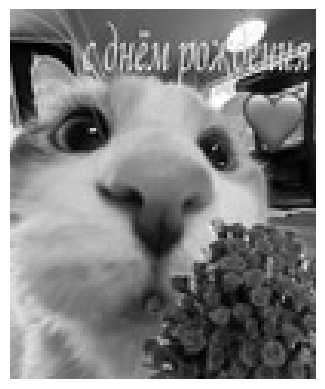

In [3]:
plt.imshow(im_gray, cmap='gray')
plt.axis('off')
plt.show()

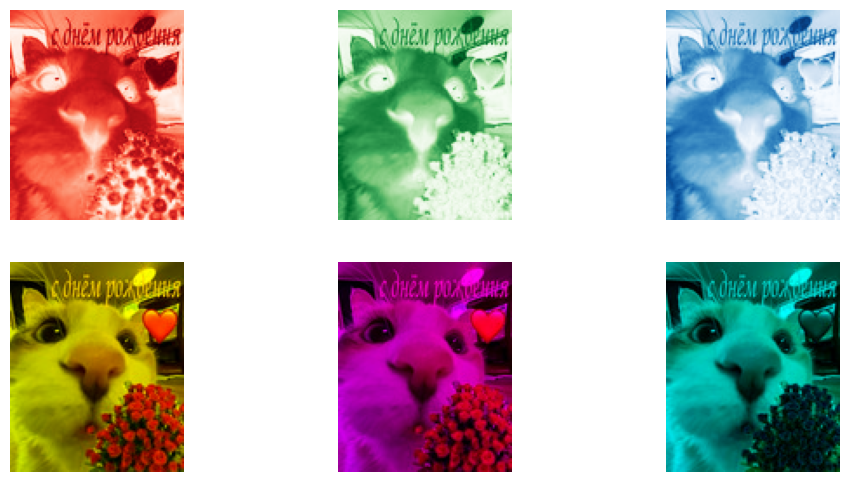

In [4]:
R, G, B = cv2.split(im_rgb)

RG = np.stack([R, G, np.zeros_like(B)], axis=2)
RB = np.stack([R, np.zeros_like(G), B], axis=2)
GB = np.stack([np.zeros_like(R), G, B], axis=2)

fig, ax = plt.subplots(2, 3, figsize=(12, 6))

ax[0, 0].imshow(R, cmap='Reds')
ax[0, 0].axis('off')

ax[0, 1].imshow(G, cmap='Greens')
ax[0, 1].axis('off')

ax[0, 2].imshow(B, cmap='Blues')
ax[0, 2].axis('off')

ax[1, 0].imshow(RG)
ax[1, 0].axis('off')

ax[1, 1].imshow(RB)
ax[1, 1].axis('off')

ax[1, 2].imshow(GB)
ax[1, 2].axis('off')

plt.show()

In [5]:
rows_for_display = [20, 52, 100]
len_row = im_rgb.shape[1]
row_pointers = np.arange(im_rgb.shape[1]) + 1

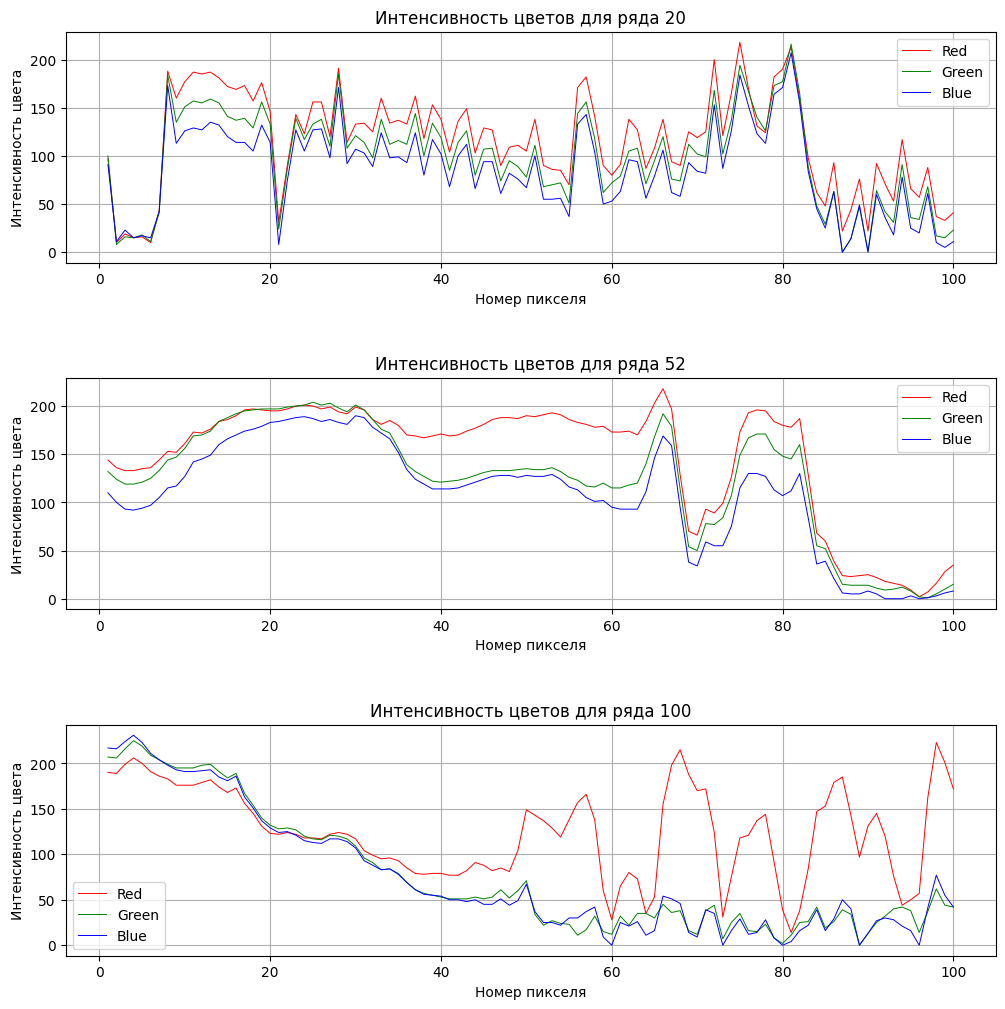

In [6]:
fig, ax = plt.subplots(len(rows_for_display), figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)

for i, row in enumerate(rows_for_display):
    ax[i].plot(row_pointers, im_rgb[row, :, 0], color='red', label='Red', linewidth=0.7)
    ax[i].plot(row_pointers, im_rgb[row, :, 1], color='green', label='Green', linewidth=0.7)
    ax[i].plot(row_pointers, im_rgb[row, :, 2], color='blue', label='Blue', linewidth=0.7)
    ax[i].set_xlabel('Номер пикселя')
    ax[i].set_ylabel('Интенсивность цвета')
    ax[i].set_title(f'Интенсивность цветов для ряда {row}')

    ax[i].legend()
    ax[i].grid(True)

plt.show()

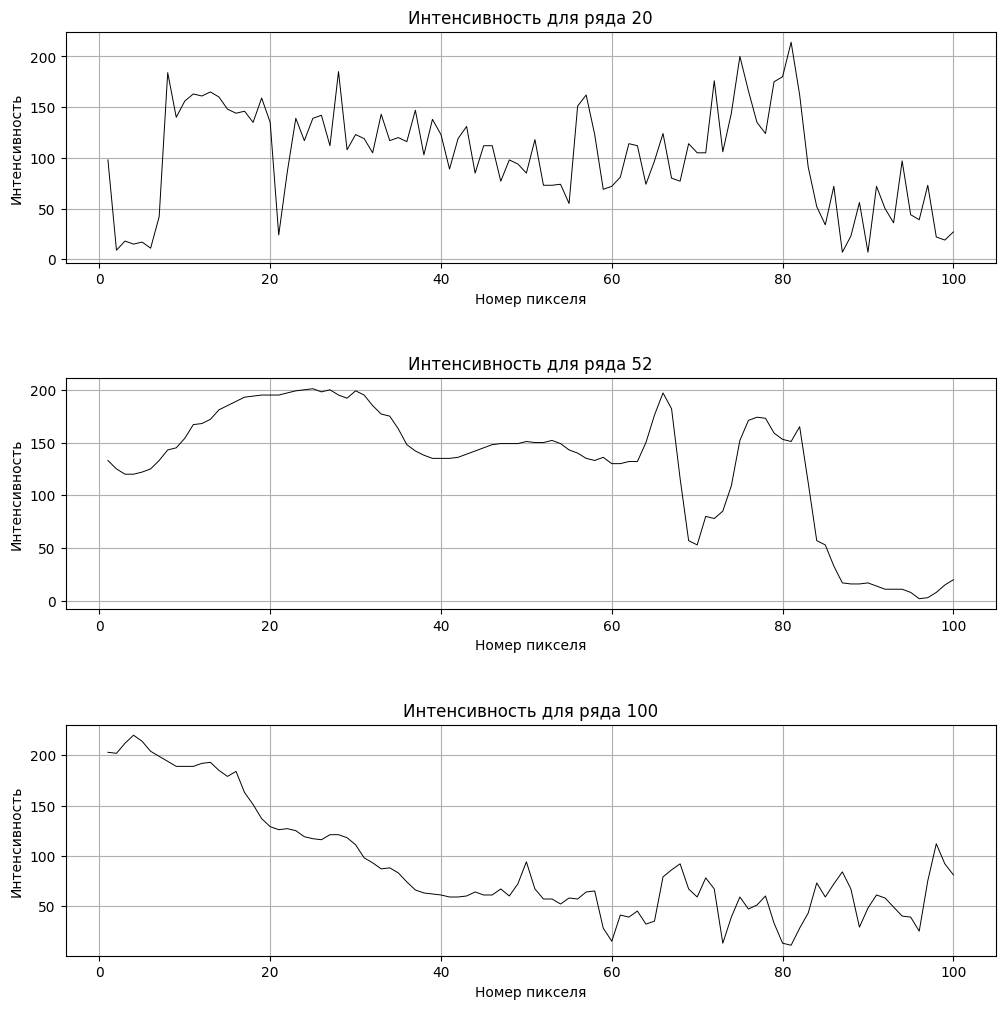

In [7]:
fig, ax = plt.subplots(len(rows_for_display), figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)

for i, row in enumerate(rows_for_display):
    ax[i].plot(row_pointers, im_gray[row, :], color='black', linewidth=0.7)
    ax[i].set_xlabel('Номер пикселя')
    ax[i].set_ylabel('Интенсивность')
    ax[i].set_title(f'Интенсивность для ряда {row}')

    ax[i].grid(True)

plt.show()

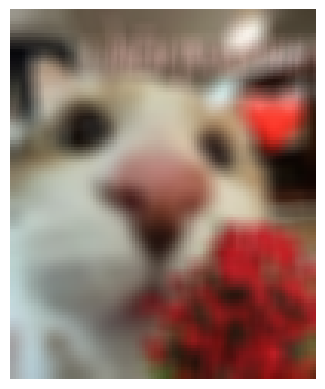

In [8]:
plt.imshow(convolute_image(im_rgb, 3, 3, kernel=box_blur_kernel, method_of_ext='reflect').astype(np.uint8))
plt.axis('off')
plt.show()

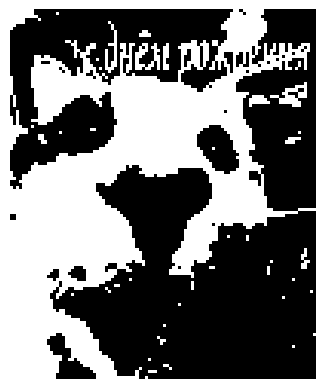

In [9]:
plt.imshow(threshold_filter(im_rgb), cmap='gray')
plt.axis('off')
plt.show()

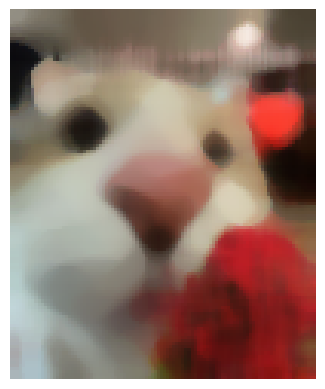

In [10]:
plt.imshow(median_filter(im_rgb, kernel_size=11))
plt.axis('off')
plt.show()

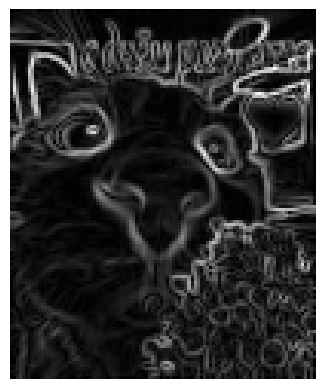

In [11]:
plt.imshow(sobel_filter(im_gray), cmap='gray')
plt.axis('off')
plt.show()

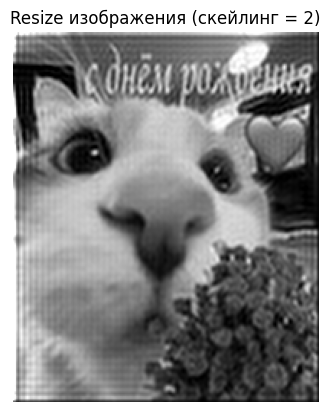

In [12]:
m = 100
n = 100
phi = 2

orig_size = im_gray.shape
new_size = (orig_size[0] * phi, orig_size[1] * phi)
resized_img = reconstruct_image(im_gray, new_size, m=m, n=n)

plt.imshow(resized_img, cmap='gray')
plt.axis('off')
plt.title(f'Resize изображения (скейлинг = {phi})')
plt.show()

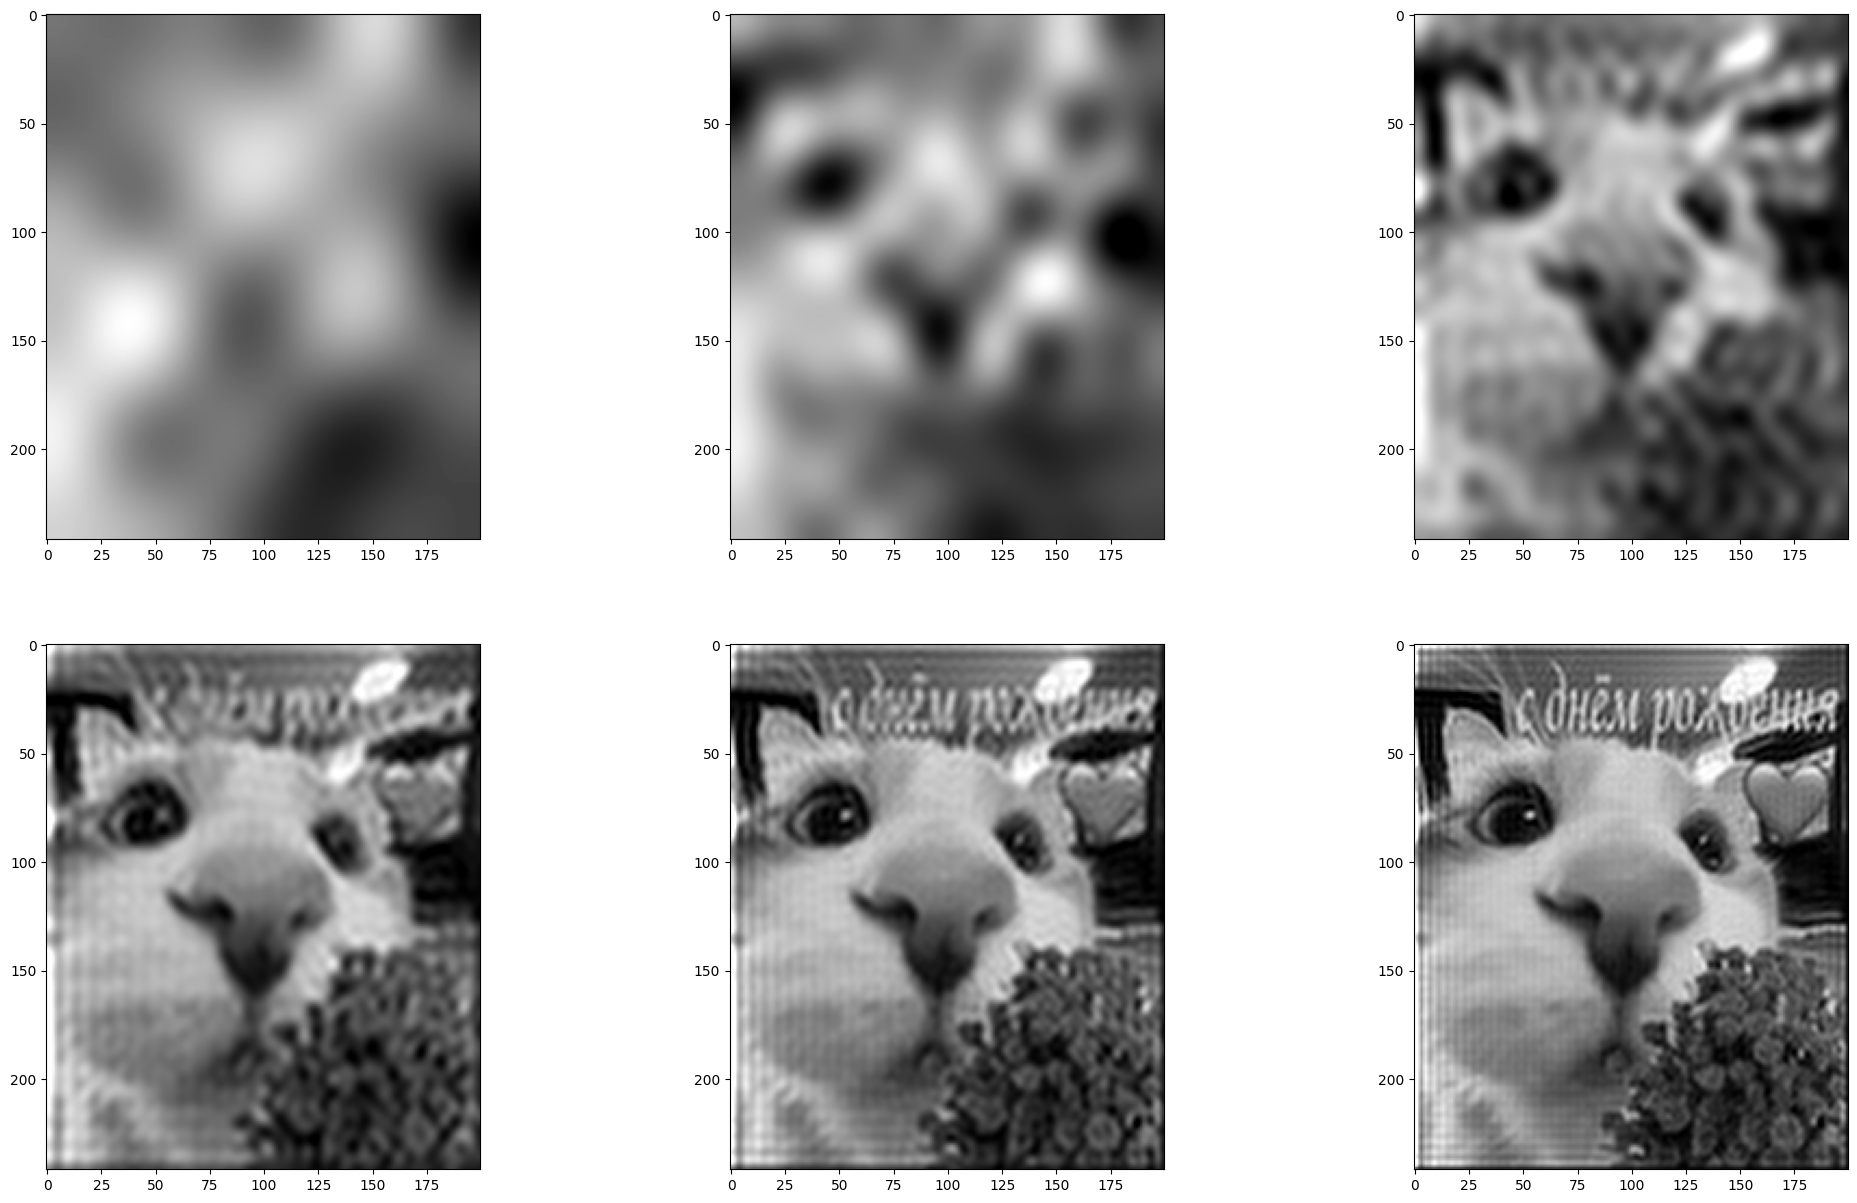

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(25, 15))
NM = [5, 10, 25, 50, 70, 100]

for i, ax in enumerate(axs.flat):
    resized_im = reconstruct_image(im_gray, new_size, NM[i], NM[i])
    ax.imshow(resized_im, cmap='gray')

plt.show()

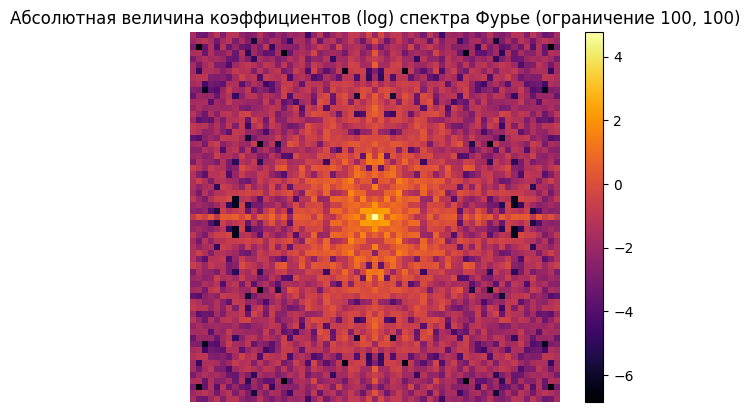

In [14]:
A_jk = compute_fourier_coefficients(im_gray, 30, 30)

magnitude_log = np.log(np.abs(A_jk))

plt.title(f'Абсолютная величина коэффициентов (log) спектра Фурье (ограничение {n}, {m})')
plt.imshow(magnitude_log, cmap='inferno')
plt.colorbar()
plt.axis('off')

plt.show()

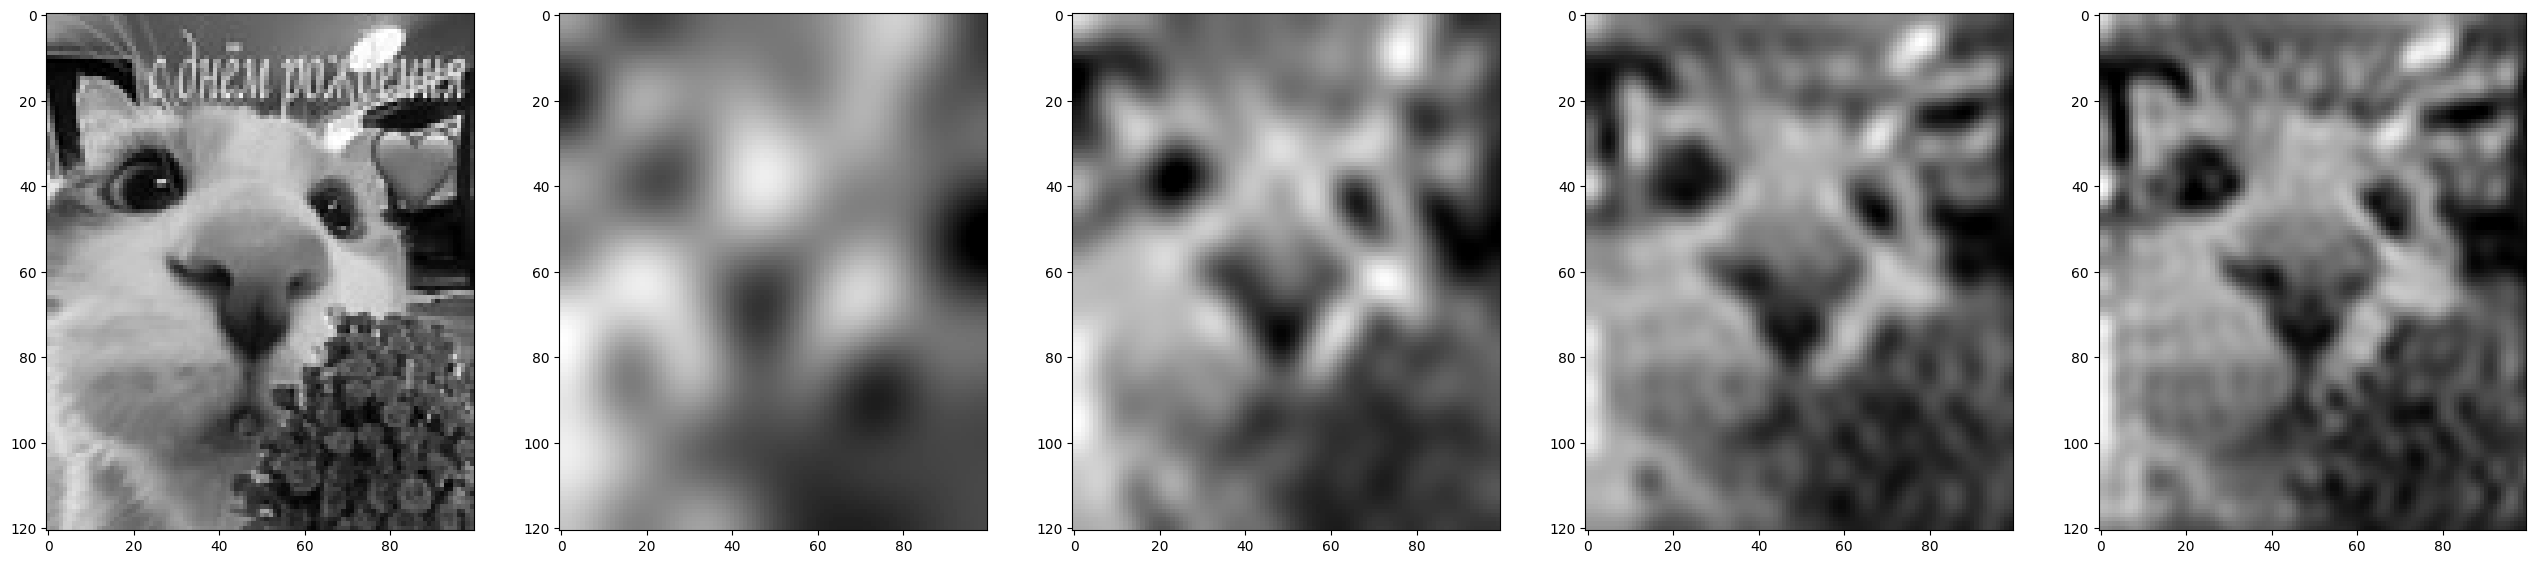

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(32, 15))
for i, ax in enumerate(axes.flat):
    if i == 0:
        ax.imshow(im_gray, cmap='gray')
        continue
    low_image = low_pass_filter(im_gray, 30, 30, i*7)
    ax.imshow(low_image, cmap='gray')

plt.show()

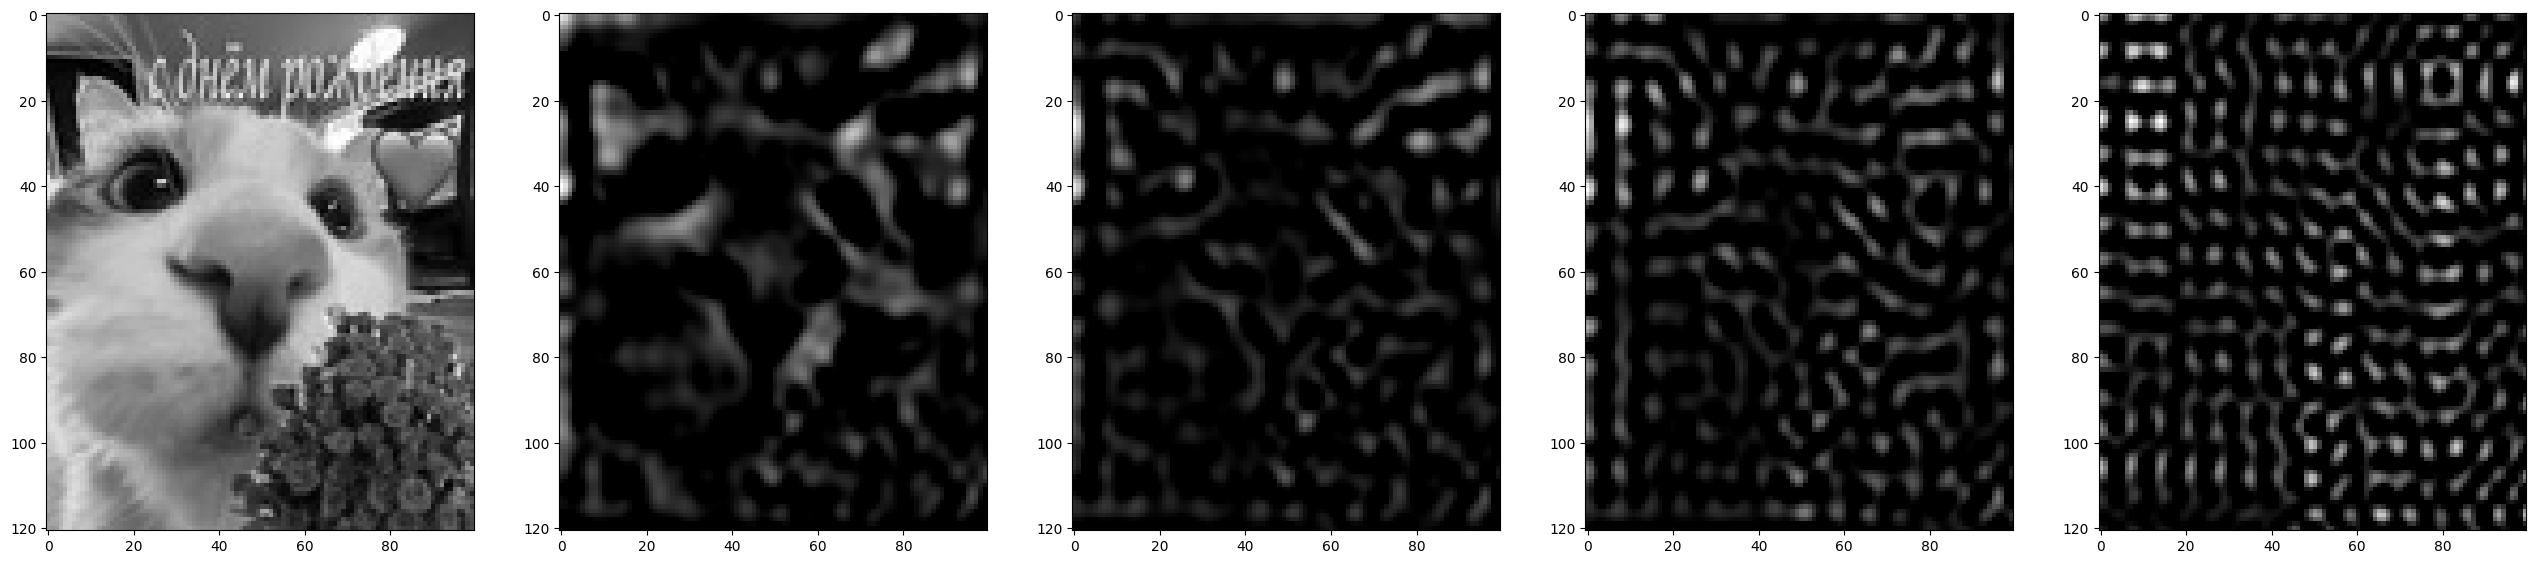

In [16]:
fig, axes = plt.subplots(1, 5, figsize=(32, 15))
for i, ax in enumerate(axes.flat):
    if i == 0:
        ax.imshow(im_gray, cmap='gray')
        continue
    low_image = high_pass_filter(im_gray, 30, 30, i*7)
    ax.imshow(low_image, cmap='gray')

plt.show()